<a href="https://colab.research.google.com/github/Dicki-ibnu/CleansingData/blob/main/2318118_Visualisasi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Langkah Import Library

Pada tahap ini kita mengimpor pustaka utama yang digunakan dalam proses analisis dan visualisasi data, yaitu pandas untuk pengelolaan data, matplotlib.pyplot dan seaborn untuk membuat grafik.
Perintah %matplotlib inline berfungsi agar grafik dapat langsung ditampilkan di dalam notebook Google Colab.

In [2]:
# Import library utama
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan grafik langsung di notebook
%matplotlib inline


#2. Menyambungkan Google Drive

Langkah ini dilakukan jika data Anda tersimpan di Google Drive. Colab akan meminta izin untuk menghubungkan (mount) Drive Anda agar notebook bisa mengakses dan membaca file yang ada di dalamnya

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3. Membaca Dataset

Kita membaca file data_bersih.xlsx yang berisi hasil survei pemilihan karir berdasarkan minat dan bakat.
Dataset ini dimuat ke dalam variabel df menggunakan fungsi pd.read_excel().
Setelah data dimuat, kita tampilkan lima baris pertama untuk memastikan struktur datanya sudah benar.

In [4]:
# Memuat dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/data_bersih.xlsx'
df = pd.read_excel(file_path)

# Menampilkan 5 data teratas
df.head()


,Nama Lengkap,Usia/Umur,Jenis Kelamin,Pekerjaan saat ini,Hobi Yang Anda Minati,Gaji Yang Anda Inginkan,Apakah Anda Lebih Suka Bekerja Di Desa Atau Di Kota,Anda Lebih Tertarik Pada Bidang?,Manakah Yang Lebih Anda Tertarik,Keterampilan Apa Yang Anda Miliki Serta Yang Ingin Anda Kembangkan.
0,Adhe Rizky Fauzie,17,Perempuan,Pelajar,Olahraga basket,1500000,kota,Seni,Teknologi,"Bermain basket,ingin berkembang"
1,Adiba Dewi Yusifa,19,Perempuan,Wiraswasta,"Rebahan, healing",2000000,kota,Akademik,HUKUM,"Keterampilan berusaha, skill"
2,Adin Rafael Lyano,19,Pria,Mahasiswa,sepak bola,5000000,kota,Non Akademik,Teknologi,bermain sepak bolaa
3,Aqila Tri Annur Fadillah,19,Perempuan,Mahasiswa,Berenang,3500000,kota,Non Akademik,Teknologi,Gatau
4,Aan,28,Pria,Pengusaha,Bermain piano,3000000,kota,Seni,Teknologi,Bermain piano


#4. Eksplorasi Awal Dataset

Tahapan ini bertujuan untuk mengenali isi dataset sebelum dianalisis lebih lanjut.
Kita melihat tipe data tiap kolom, memeriksa apakah ada nilai kosong, dan menghitung jumlah nilai unik di setiap kolom.
Langkah ini penting untuk memahami kualitas data serta menentukan apakah perlu dilakukan pembersihan.

In [5]:
# Info kolom dan tipe data
df.info()

# Cek nilai kosong
df.isnull().sum()

# Cek data unik per kolom
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Nama Lengkap                                                          463 non-null    object
 1   Usia/Umur                                                             463 non-null    object
 2   Jenis Kelamin                                                         463 non-null    object
 3   Pekerjaan saat ini                                                    463 non-null    object
 4   Hobi Yang Anda Minati                                                 461 non-null    object
 5   Gaji Yang Anda Inginkan                                               472 non-null    int64 
 6   Apakah Anda Lebih Suka Bekerja Di Desa Atau Di Kota                   472 non-null    object
 7   Anda Leb

#5. Persiapan Dataset

Data disiapkan agar mudah diolah.
Nama kolom diubah menjadi lebih sederhana dan seragam (misalnya Minat menjadi minat).
Kemudian baris yang memiliki nilai kosong di kolom penting seperti minat, bakat, atau karir dihapus agar hasil analisis tidak bias.

In [6]:
# Ganti nama kolom agar mudah digunakan
df.rename(columns={
    'Hobi Yang Anda Minati': 'minat',
    'Keterampilan Apa Yang Anda Miliki Serta Yang Ingin Anda Kembangkan. ': 'keterampilan',
    'Anda Lebih Tertarik Pada Bidang?': 'karir'
}, inplace=True)

# Hapus baris kosong di kolom utama
df = df.dropna(subset=['minat', 'keterampilan', 'karir'])

# Tampilkan kolom utama
df[['Nama Lengkap', 'minat', 'keterampilan', 'karir']].head()


,Nama Lengkap,minat,keterampilan,karir
0,Adhe Rizky Fauzie,Olahraga basket,"Bermain basket,ingin berkembang",Seni
1,Adiba Dewi Yusifa,"Rebahan, healing","Keterampilan berusaha, skill",Akademik
2,Adin Rafael Lyano,sepak bola,bermain sepak bolaa,Non Akademik
3,Aqila Tri Annur Fadillah,Berenang,Gatau,Non Akademik
4,Aan,Bermain piano,Bermain piano,Seni


#6. Menambahkan Kolom Kecocokan

Tahap ini meniru bagian penambahan kolom di contoh PDF.
Kita membuat kolom baru bernama kecocokan yang menunjukkan tingkat kesesuaian antara minat dan bakat.
Jika keduanya sama, maka nilainya 100 (artinya sangat cocok); jika berbeda, diberi nilai 60.
Kolom ini membantu kita menilai sejauh mana pilihan karir sesuai dengan bakat responden.

In [7]:
df['kecocokan'] = df.apply(lambda x: 100 if x['minat'] in x['keterampilan'] else 60, axis=1)

df[['Nama Lengkap', 'minat', 'keterampilan', 'karir', 'kecocokan']].head()


,Nama Lengkap,minat,keterampilan,karir,kecocokan
0,Adhe Rizky Fauzie,Olahraga basket,"Bermain basket,ingin berkembang",Seni,60
1,Adiba Dewi Yusifa,"Rebahan, healing","Keterampilan berusaha, skill",Akademik,60
2,Adin Rafael Lyano,sepak bola,bermain sepak bolaa,Non Akademik,100
3,Aqila Tri Annur Fadillah,Berenang,Gatau,Non Akademik,60
4,Aan,Bermain piano,Bermain piano,Seni,100


#7. Agregasi Data

Di sini kita melakukan pengelompokan data untuk merangkum informasi yang tersebar.
Data dikelompokkan berdasarkan kombinasi minat dan karir yang dipilih, lalu dihitung jumlah responden di setiap kombinasi tersebut.
Hasilnya berupa tabel baru yang memperlihatkan seberapa banyak responden dengan minat tertentu memilih karir tertentu.

In [8]:
data_agregat = df.groupby(['minat', 'karir']).size().reset_index(name='jumlah')
data_agregat.head()


,minat,karir,jumlah
0,menonton,Sains,1
1,-,Akademik,1
2,-,Non Akademik,1
3,Akting,Seni,2
4,"BERENANG,MAIN GAME",Non Akademik,1


#8. Visualisasi 1: Bar Chart (Jumlah Responden per Minat)

Langkah ini menampilkan grafik batang untuk memperlihatkan jumlah responden berdasarkan minat mereka.
Sumbu X menunjukkan jenis minat, dan sumbu Y menunjukkan jumlah responden.
Grafik ini membantu kita melihat minat yang paling dominan di antara seluruh responden.

/tmp/ipython-input-1380045156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_minat.values, y=top_minat.index, palette='mako')


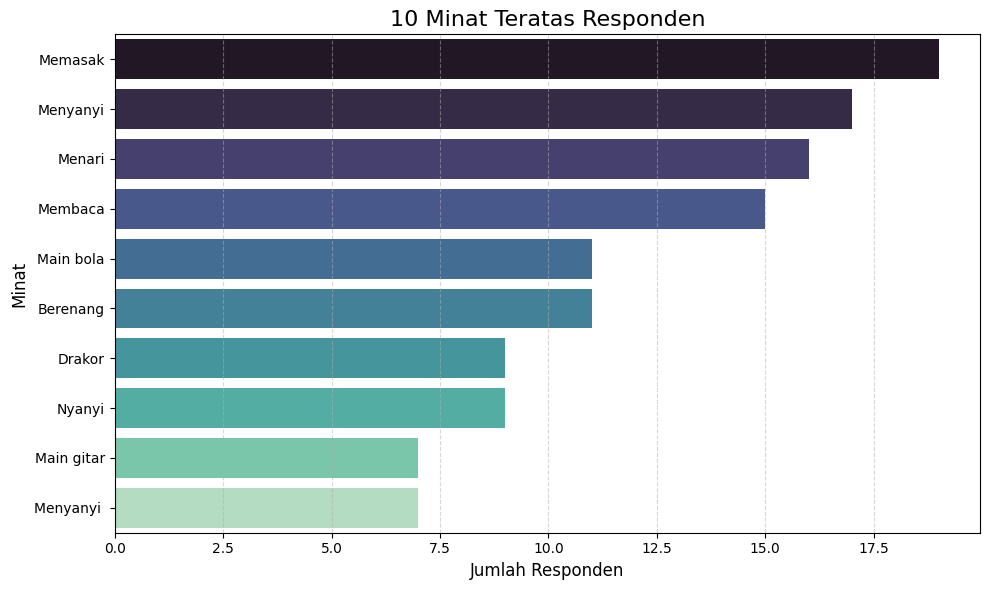

In [9]:
top_minat = df['minat'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_minat.values, y=top_minat.index, palette='mako')

plt.title('10 Minat Teratas Responden', fontsize=16)
plt.xlabel('Jumlah Responden', fontsize=12)
plt.ylabel('Minat', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#9. Visualisasi 2: Heatmap (Hubungan Minat dan Karir)

Visualisasi ini menggunakan heatmap untuk menunjukkan hubungan antara minat dan karir yang dipilih.
Semakin tinggi nilai kecocokan, warnanya akan semakin pekat.
Heatmap membantu kita mengidentifikasi kombinasi minat–karir yang paling selaras menurut data survei.

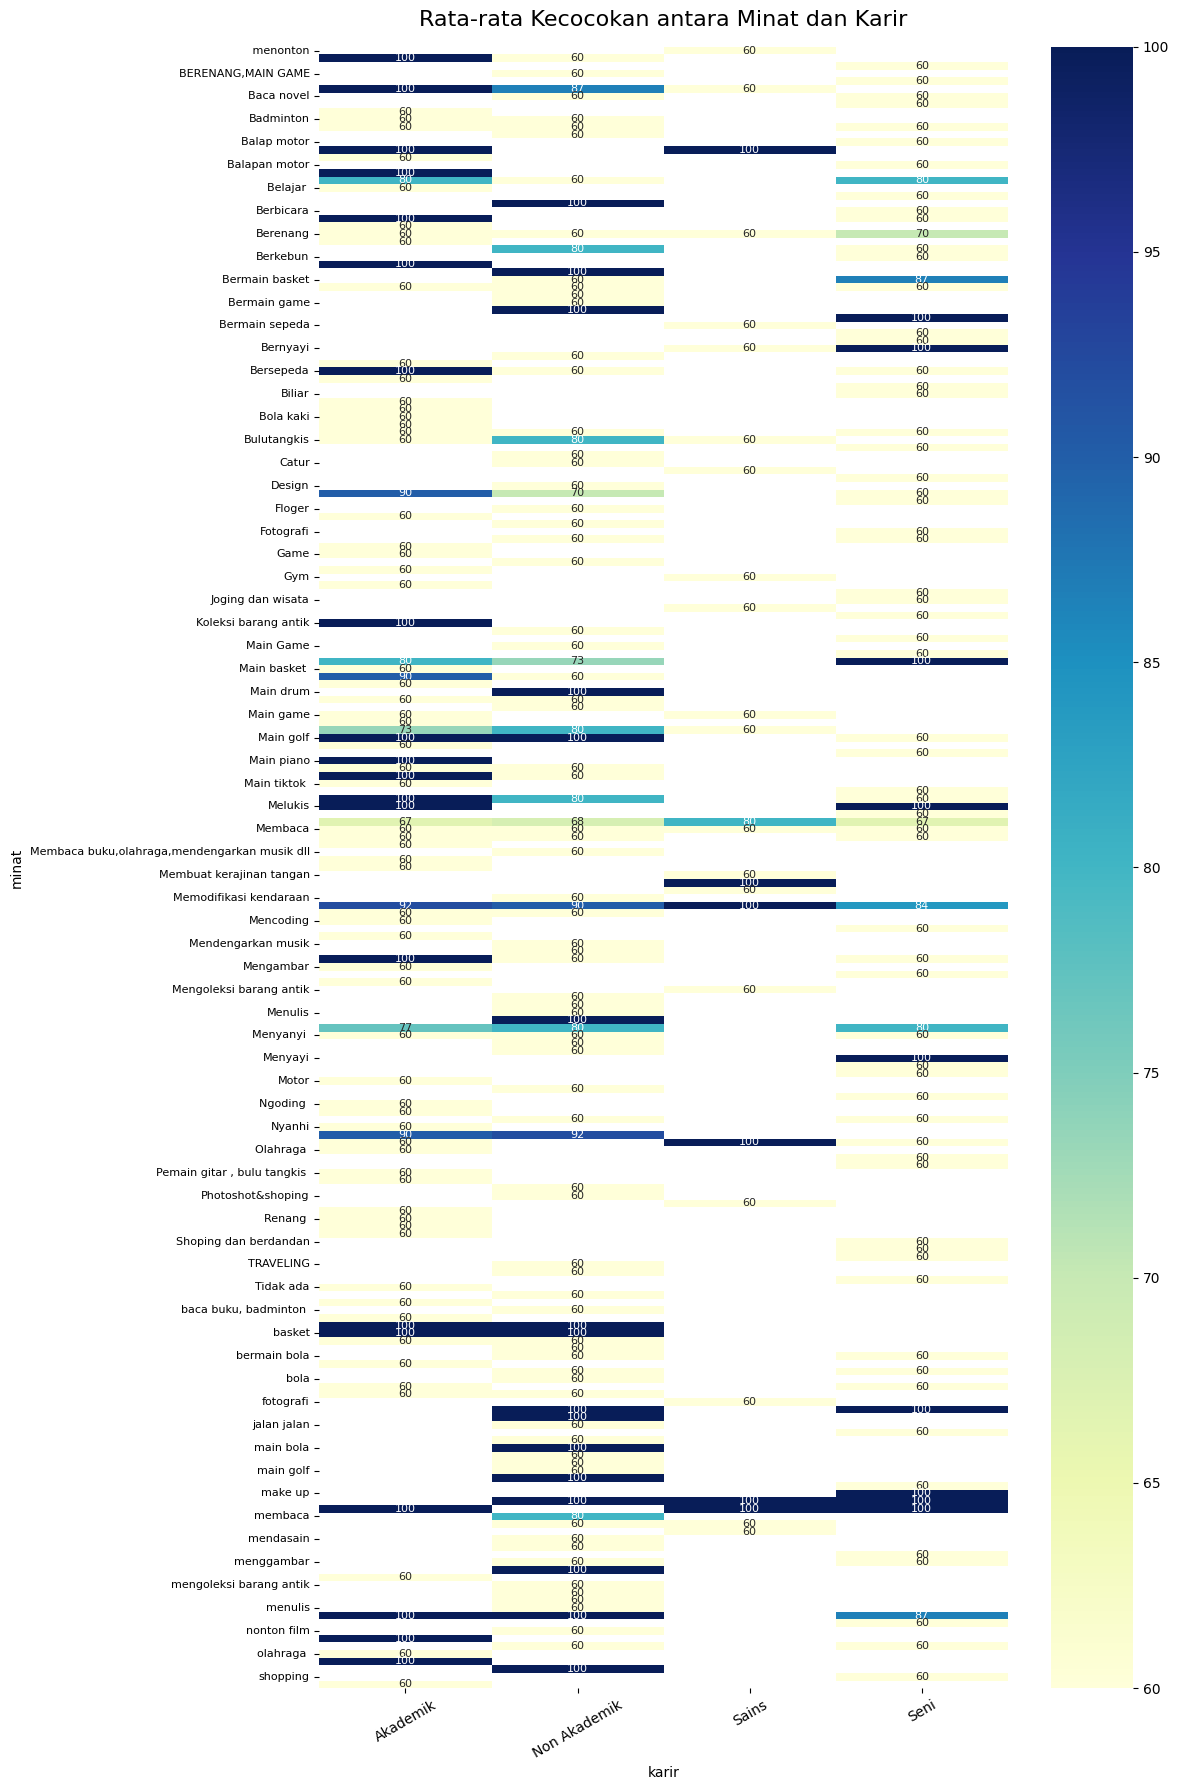

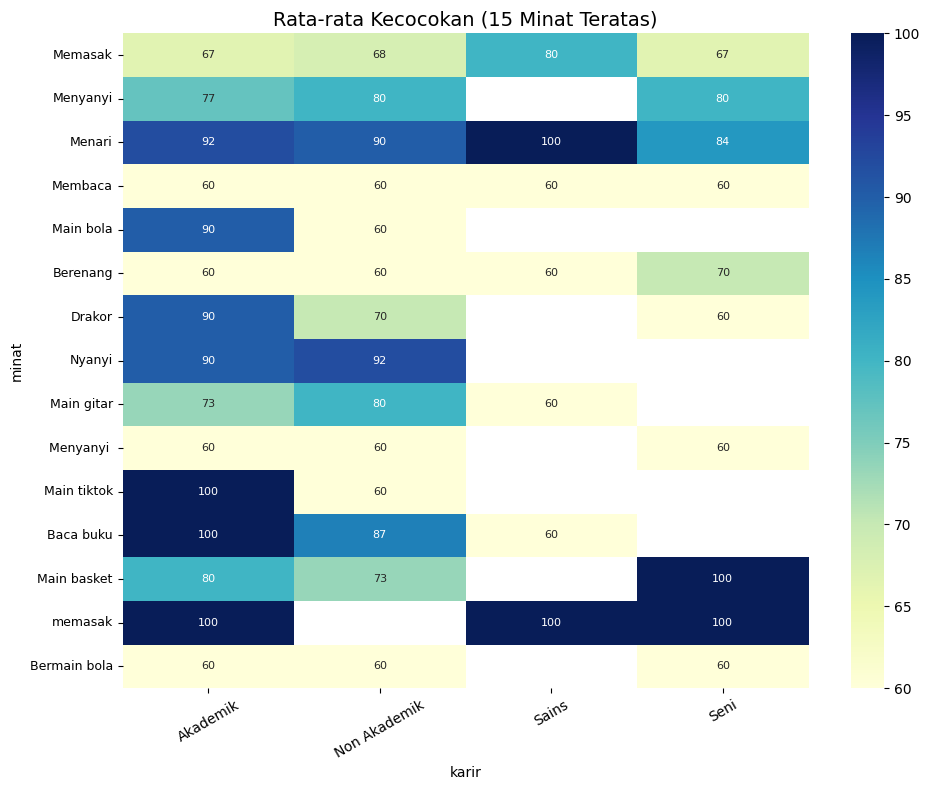

In [17]:
plt.figure(figsize=(12, 18))  # tinggi grafik diperbesar
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.0f',
            annot_kws={"size": 8})  # kecilkan angka annotasi

plt.title('Rata-rata Kecocokan antara Minat dan Karir', fontsize=16, pad=15)
plt.xticks(fontsize=10, rotation=30)  # rotasi tulisan di bawah
plt.yticks(fontsize=8)                # kecilkan font sumbu Y
plt.tight_layout()

# ambil 15 minat dengan responden terbanyak
top_minat = df['minat'].value_counts().head(15).index
pivot_top = pivot.loc[top_minat]

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_top, annot=True, cmap='YlGnBu', fmt='.0f', annot_kws={"size":8})
plt.title('Rata-rata Kecocokan (15 Minat Teratas)', fontsize=14)
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()



In [16]:
# Create a pivot table for the heatmap
pivot = df.pivot_table(index='minat', columns='karir', values='kecocokan', aggfunc='mean')

# Display the pivot table
display(pivot.head())

karir,Akademik,Non Akademik,Sains,Seni
minat,,,,
menonton,NaN,NaN,60.0,NaN
-,100.0,60.0,NaN,NaN
Akting,NaN,NaN,NaN,60.0
"BERENANG,MAIN GAME",NaN,60.0,NaN,NaN
Baca buku,NaN,NaN,NaN,60.0


#10. Visualisasi 3: Pie Chart (Proporsi Pilihan Karir)

Tahap ini menampilkan grafik lingkaran untuk melihat proporsi atau persentase pilihan karir dari semua responden.
Pie chart memudahkan pembaca memahami karir mana yang paling banyak dipilih dan seberapa besar perbandingan antar karir.

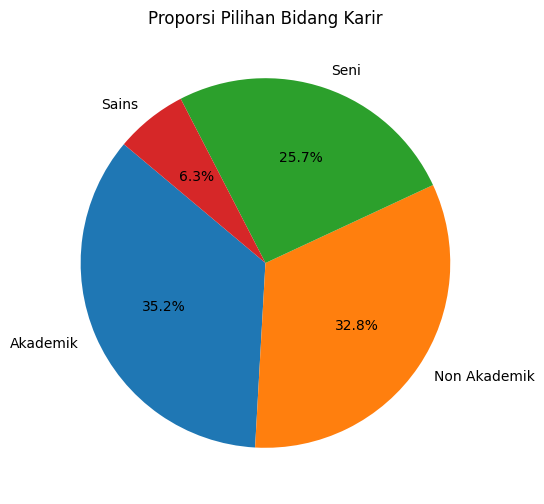

In [14]:
karir_count = df['karir'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(karir_count.values, labels=karir_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Pilihan Bidang Karir')
plt.show()


#11. Interpretasi Hasil

Bagian terakhir adalah interpretasi atau analisis dari grafik-grafik yang sudah dibuat.
Kita menjelaskan pola yang muncul, misalnya minat apa yang paling populer, karir apa yang paling banyak dipilih, dan seberapa kuat hubungan antara minat dan bakat terhadap keputusan karir.
Tahapan ini menjadi dasar untuk menyusun kesimpulan dari keseluruhan proses visualisasi data.

In [15]:
print("- Hasil Analisis Visualisasi:")
print("- Sebagian besar responden menunjukkan minat pada bidang tertentu yang juga sesuai dengan keterampilan yang mereka miliki.")
print("- Bidang karir yang paling banyak diminati dapat dilihat dari pie chart.")
print("- Heatmap menunjukkan kombinasi minat dan bidang karir yang paling memiliki tingkat kecocokan tinggi.")


- Hasil Analisis Visualisasi:
- Sebagian besar responden menunjukkan minat pada bidang tertentu yang juga sesuai dengan keterampilan yang mereka miliki.
- Bidang karir yang paling banyak diminati dapat dilihat dari pie chart.
- Heatmap menunjukkan kombinasi minat dan bidang karir yang paling memiliki tingkat kecocokan tinggi.
